### Labor Data By Industry Analysis

In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the National_Employment_Matrix_OCC_15-2051.csv

In [2]:
# Relative path from script to CSV
csv_path = "../../data/National_Employment_Matrix_OCC_15-2051.csv"

# Load the CSV

df = pd.read_csv(csv_path)

Top 10 Industries Employing Data Scientists

C:\Users\julia\AppData\Local\Temp\ipykernel_19920\1102515694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industries["2024 Percent of Occupation"] = pd.to_numeric(
C:\Users\julia\AppData\Local\Temp\ipykernel_19920\1102515694.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


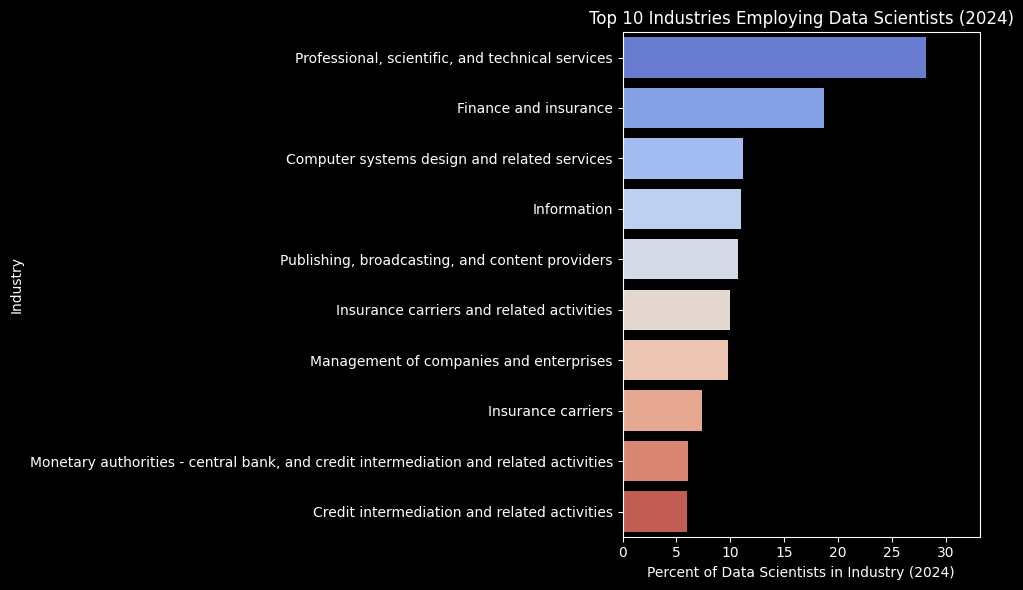

In [ ]:
unique_industries = df["Industry Title"].unique()


df_industries = df[
    (df["Industry Title"] != "Total, all industries") &
    (df["Industry Title"] != "Total wage and salary employment")
]


# Ensure Percent of Occupation is numeric
df_industries["2024 Percent of Occupation"] = pd.to_numeric(
    df_industries["2024 Percent of Occupation"], errors='coerce'
)

# drop duplicates
df_industries = df_industries.drop_duplicates(subset="Industry Title")

# Get top 10 industries by 2024 Percent of Occupation
df_industries.loc[:, "2024 Percent of Occupation"] = pd.to_numeric(
    df_industries["2024 Percent of Occupation"], errors='coerce'
)


plt.figure(figsize=(10,6), facecolor='black')
ax = sns.barplot(
    x="2024 Percent of Occupation",
    y="Industry Title",
    data=top10,
    palette = "coolwarm"
)

# Set axes and text colors to white
ax.set_facecolor('black')               
ax.tick_params(colors='white')          
ax.xaxis.label.set_color('white')       
ax.yaxis.label.set_color('white')       
ax.title.set_color('white')             
for spine in ax.spines.values():        
    spine.set_color('white')

plt.xlabel("Percent of Data Scientists in Industry (2024)")
plt.ylabel("Industry")
plt.title("Top 10 Industries Employing Data Scientists (2024)")
plt.xlim(0, top10["2024 Percent of Occupation"].max() + 5)
plt.tight_layout()
plt.show()


### Largest Growth in Data Science

                                        Industry Title  \
57   Other electrical equipment and component manuf...   
56   Electrical equipment, appliance, and component...   
227  Services for the elderly and persons with disa...   
133  Computing infrastructure providers, data proce...   
211                           Home healthcare services   
209  Outpatient mental health and substance abuse c...   
122                                Software publishers   
208                            Outpatient care centers   
163       Computer systems design and related services   
181                          Security systems services   

     Employment Percent Change, 2024-2034  
57                                   62.8  
56                                   52.0  
227                                  51.5  
133                                  50.6  
211                                  48.4  
209                                  48.2  
122                                  48.1  
208      

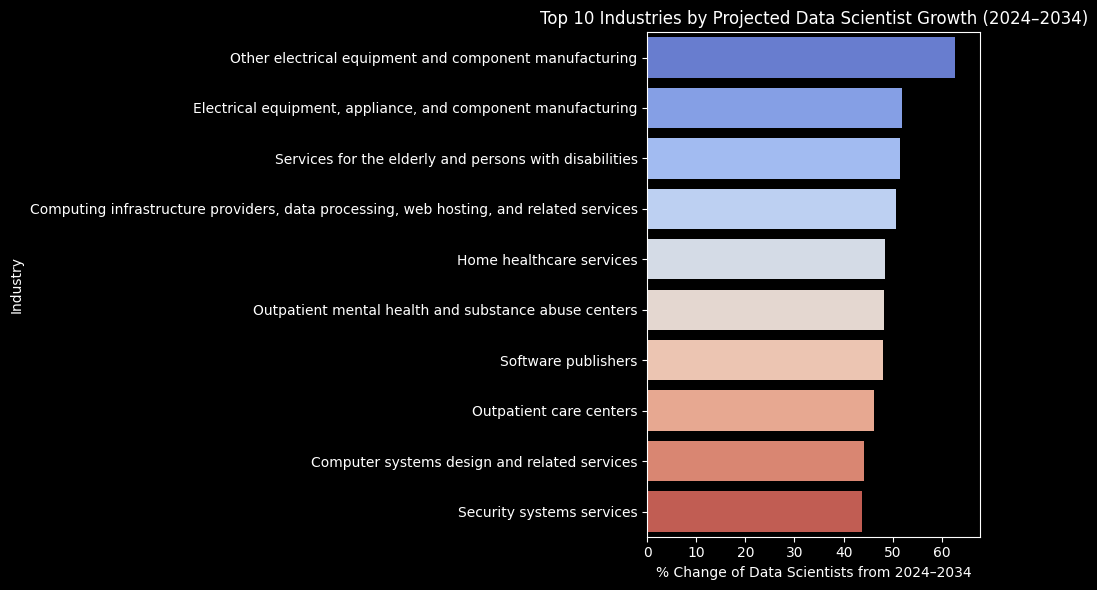

In [22]:
# Ensure column is numeric
df_industries = df_industries.copy()
df_industries.loc[:, "Employment Percent Change, 2024-2034"] = pd.to_numeric(
    df_industries["Employment Percent Change, 2024-2034"], errors='coerce'
)

# Get top 10 industries by employment percent change
top10_growth = df_industries.sort_values(
    by="Employment Percent Change, 2024-2034", ascending=False
).head(10)

# Plot
plt.figure(figsize=(10, 6), facecolor='black')
ax = sns.barplot(
    x="Employment Percent Change, 2024-2034",
    y="Industry Title",
    hue="Industry Title",         # needed for Seaborn >= 0.14
    data=top10_growth,
    palette="coolwarm",
    legend=False
)

print(top10_growth[["Industry Title","Employment Percent Change, 2024-2034"]])

# Style (white text, dark background)
ax.set_facecolor('black')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
for spine in ax.spines.values():
    spine.set_color('white')

plt.xlabel("% Change of Data Scientists from 2024–2034")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Projected Data Scientist Growth (2024–2034)")
plt.xlim(0, top10_growth["Employment Percent Change, 2024-2034"].max() + 5)
plt.tight_layout()
plt.show()